# Analyse exploratoire*


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
from matplotlib.colors import ListedColormap
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

In [129]:
dataset = pd.read_csv('cleanData.csv')


In [130]:
dataset.shape

(22584, 16)

### Analyse univariée

In [131]:
datasetuni=dataset.copy()

In [132]:
datasetuni.describe()

,code,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,2.258400e+04,22584.000000,22584.000000,22584.000000,22584.0,22584.000000,22584.000000,22584.000000,22584.000000,22584.000000,22584.000000
mean,3.651745e+12,789.604903,6.344974,2.254871,0.0,0.010472,9.481339,2.091123,6.081174,0.631892,4.618402
std,5.579752e+12,652.871245,9.412110,3.759307,0.0,0.012351,12.522979,1.863772,5.790942,0.692436,7.952471
min,1.000000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,3.222473e+12,250.000000,0.500000,0.100000,0.0,0.000000,1.300000,0.500000,1.200000,0.040000,-1.000000
50%,3.270161e+12,531.500000,2.500000,0.636000,0.0,0.005800,4.000000,1.700000,4.600000,0.400000,3.000000
75%,3.564709e+12,1313.250000,7.400000,2.500000,0.0,0.016200,12.000000,3.260000,9.000000,1.016000,10.000000
max,3.564707e+14,3573.000000,49.150000,17.700000,0.0,0.057400,55.800000,9.000000,24.400000,3.332480,32.000000


Suite au nettoyage effectué dans le Notebook précédent, les valeurs médianes, écarts-type et valeus max semblent être cohérentes compte tenu du volume de données.

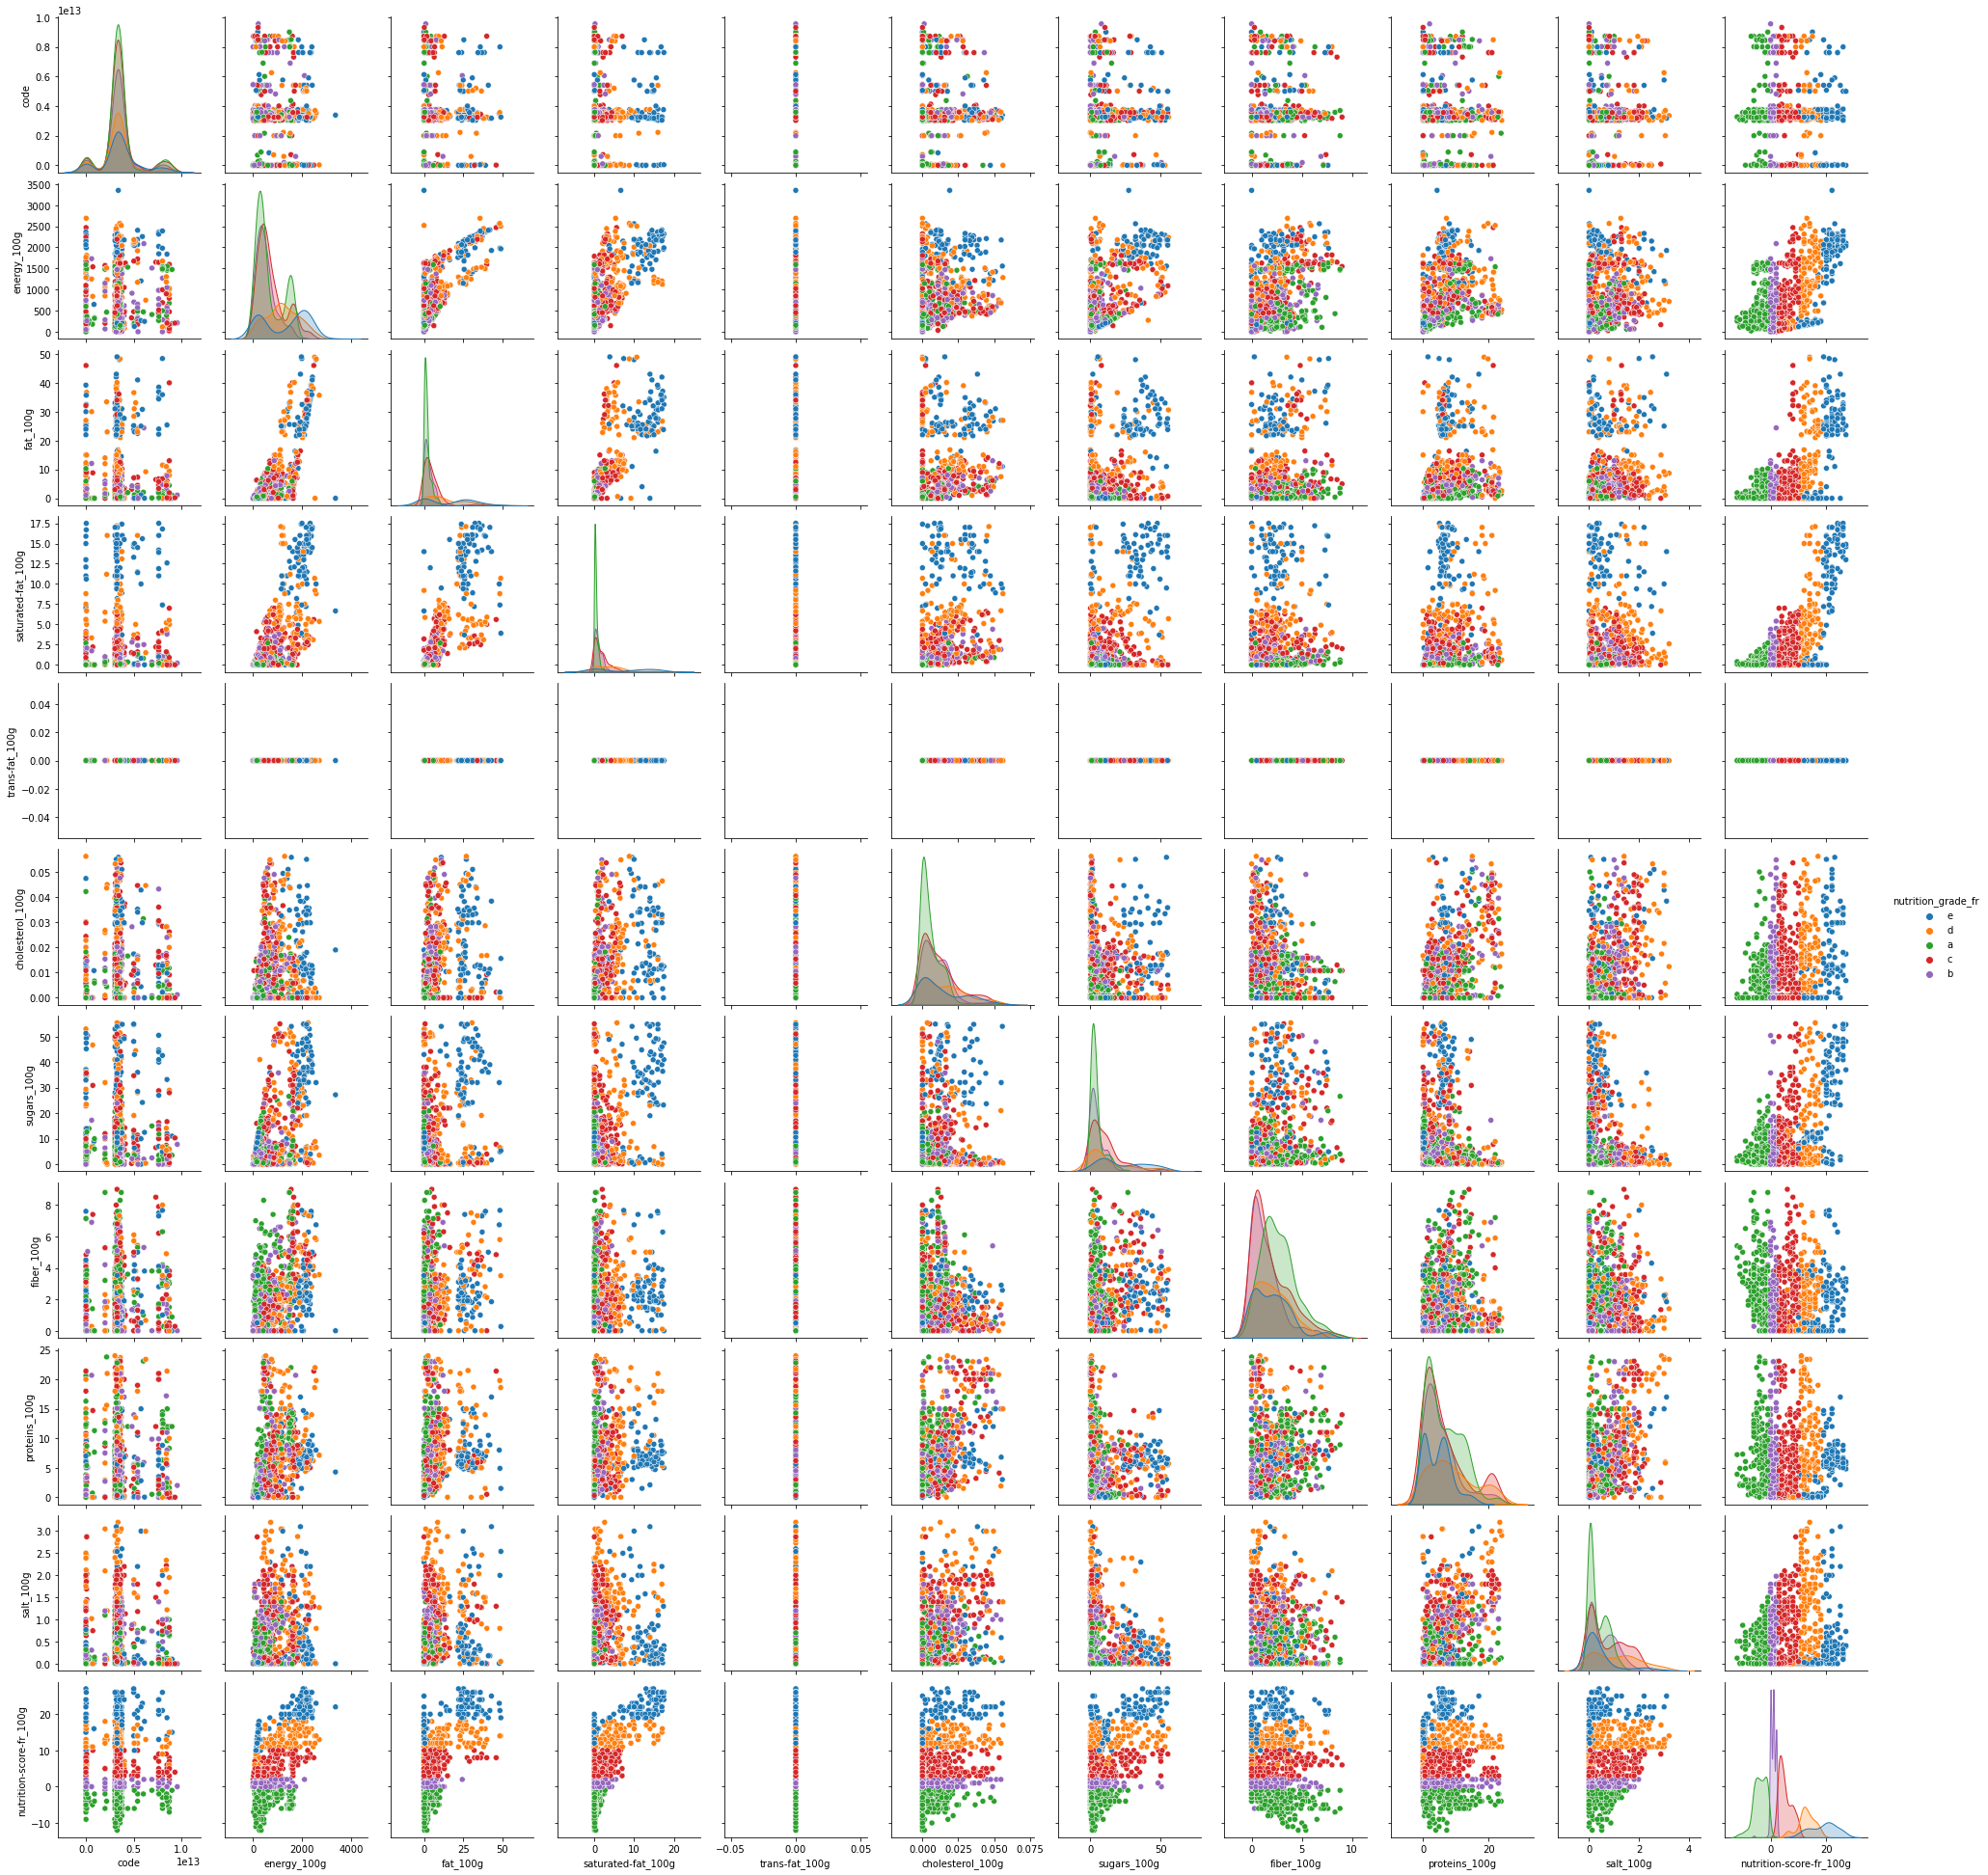

In [133]:
sns.pairplot(datasetuni.sample(frac=0.05), hue="nutrition_grade_fr")


### Observatioon de la Répartition du Nutriscore

In [134]:
datasetuni['nutrition_grade_fr'].unique()

array(['e', 'd', 'b', 'c', 'a'], dtype=object)

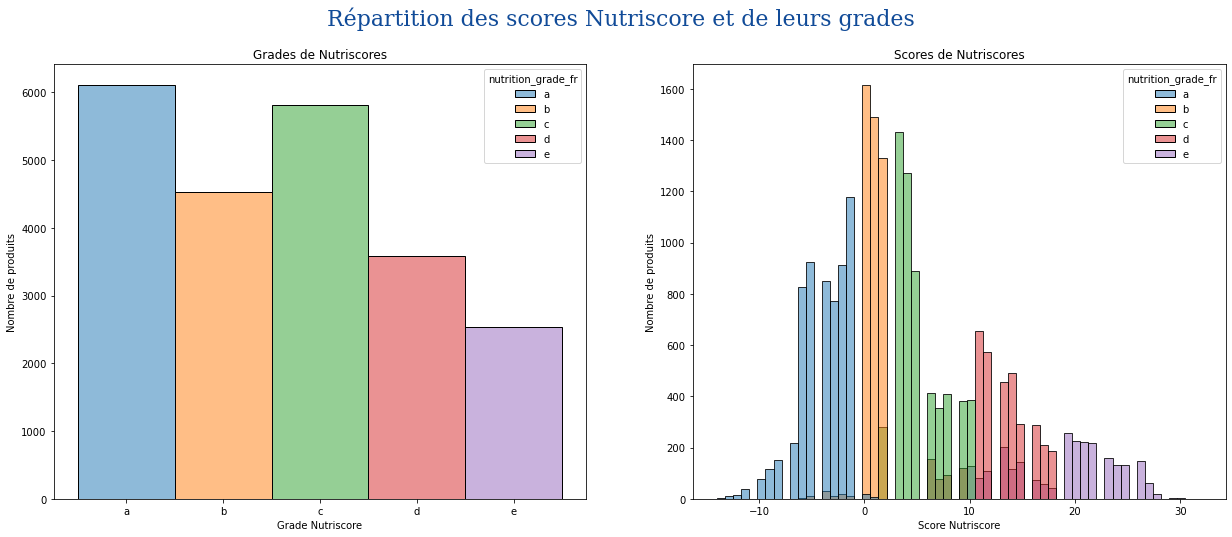

In [135]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(21,8))
fig.suptitle(r"Répartition des scores Nutriscore et de leurs grades" "\n", fontdict=font_title, fontsize=22)

sns.histplot(data=datasetuni.sort_values("nutrition_grade_fr"), x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=axes[0])
axes[0].set_title('Grades de Nutriscores')
axes[0].set_xlabel("Grade Nutriscore")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=datasetuni.sort_values("nutrition_grade_fr"), x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=axes[1])
axes[1].set_title('Scores de Nutriscores')
axes[1].set_xlabel("Score Nutriscore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

### Répartition des scores nutriscore par catégorie de produits (pnns_groups_1)

In [136]:
datasetuni = datasetuni[datasetuni['pnns_groups_1'].notna()]

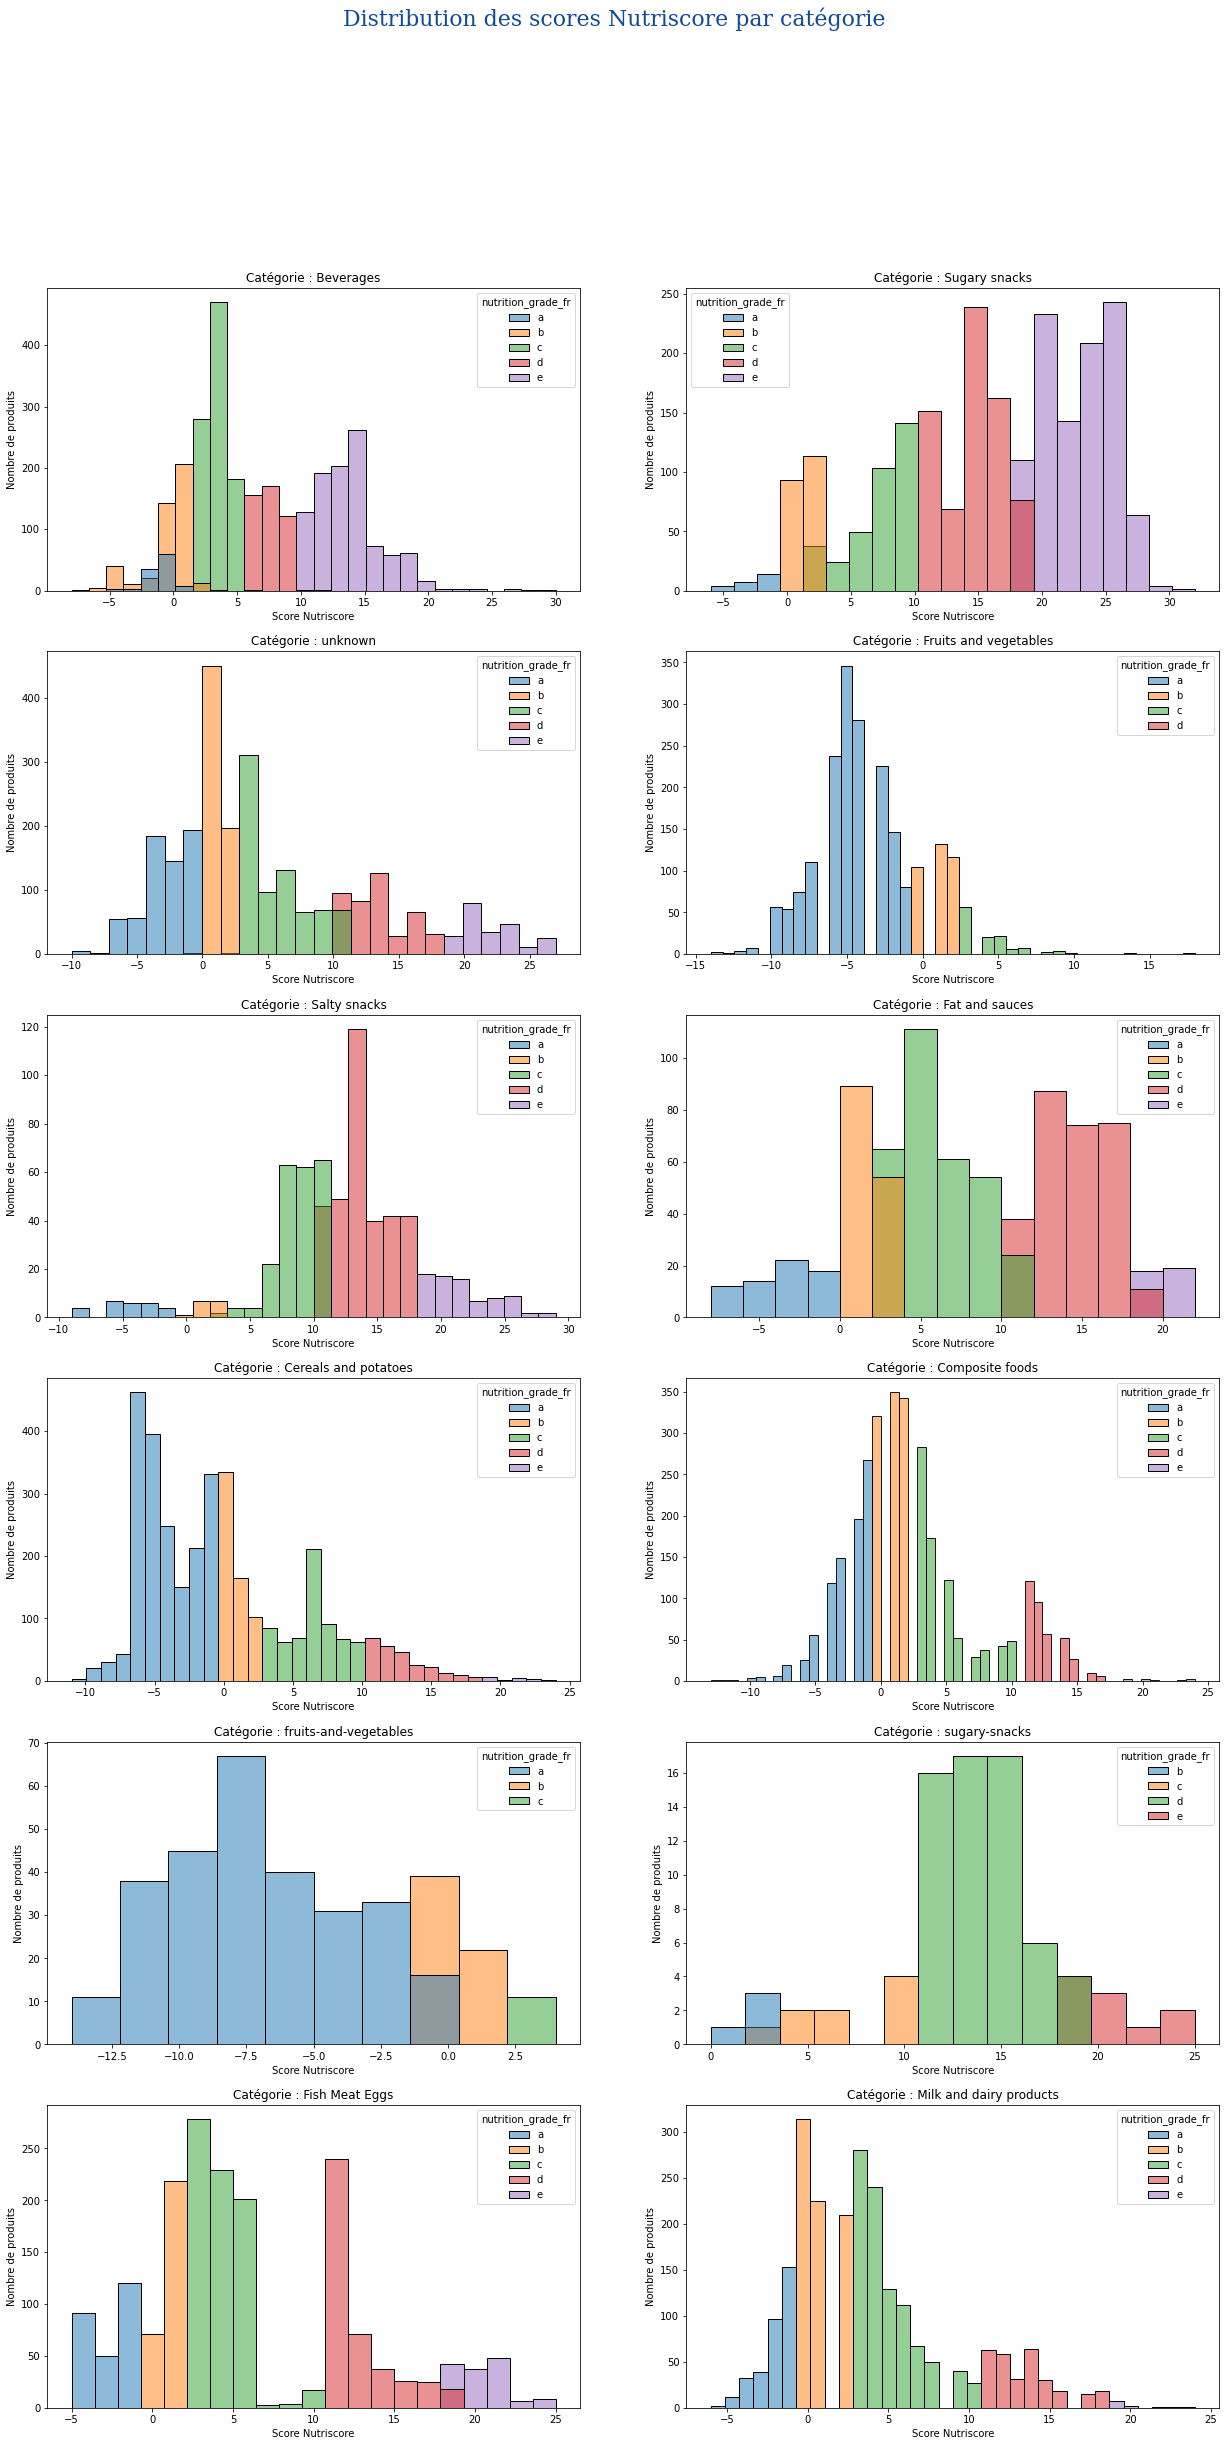

In [137]:
n_sub = len(datasetuni['pnns_groups_1'].unique())
n_col = 2
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des scores Nutriscore par catégorie", fontdict=font_title, fontsize=22)
i=0
for ax in axes.reshape(-1):
    cat = datasetuni['pnns_groups_1'].unique()[i]
    subset = datasetuni[datasetuni['pnns_groups_1']==cat].sort_values("nutrition_grade_fr")
    sns.histplot(data=subset, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Score Nutriscore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

ANOVA

Les hypothèses posées sont les suivantes :

H0 : La distribution des échantillons est similaire (et donc la catégorie n'a aucune influence sur le Nutriscore).
H1 : Une ou plusieurs distributions sont inégales.

In [138]:
datasetuni = datasetuni.rename(columns={'nutrition-score-fr_100g': 'nutriscore'})

In [139]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = smf.ols('nutriscore~pnns_groups_1', data=datasetuni).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             nutriscore   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1385.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:04:37   Log-Likelihood:                -72640.
No. Observations:               22584   AIC:                         1.453e+05
Df Residuals:                   22571   BIC:                         1.454e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [140]:
#Tableau d'analyse de variance
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_1,605749.884551,12.0,1385.348154,0.0
Residual,822439.507408,22571.0,NaN,NaN


p-value = 0 (test de Fisher) < 5%. Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.
La catégorie de produit a donc bien une influence sur le Nutriscore.



Aucune d'entre elles ne présente une distribution normale

## Analyse Bivariée

In [141]:
datasetbi = dataset.copy()

In [142]:
datasetbi = datasetbi.drop(['code','trans-fat_100g'],axis=1)

In [143]:
var = datasetbi.columns
varNum = var[6:]

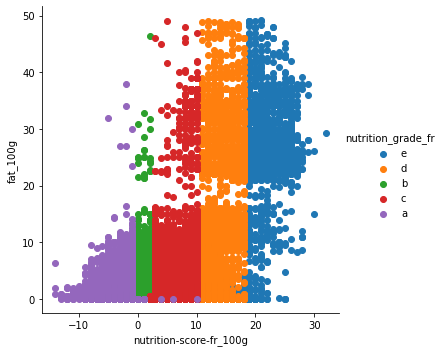

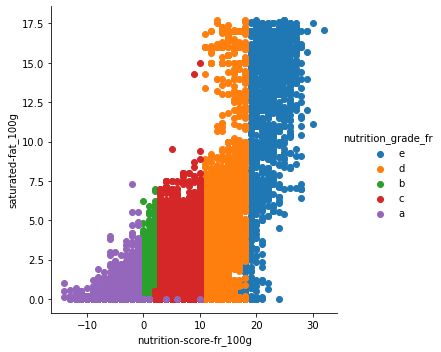

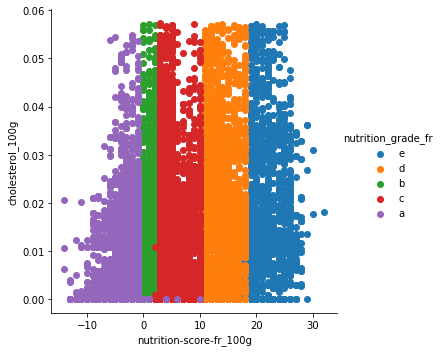

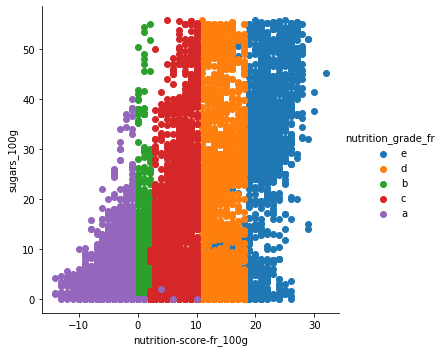

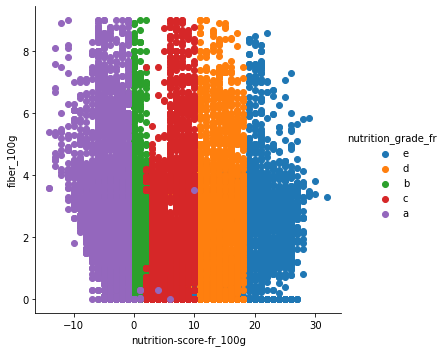

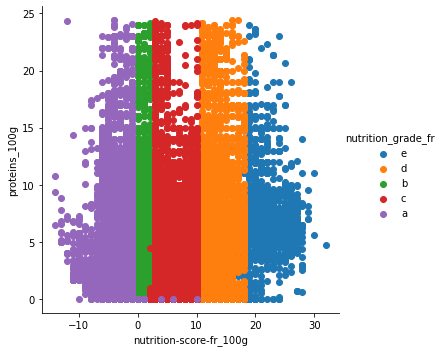

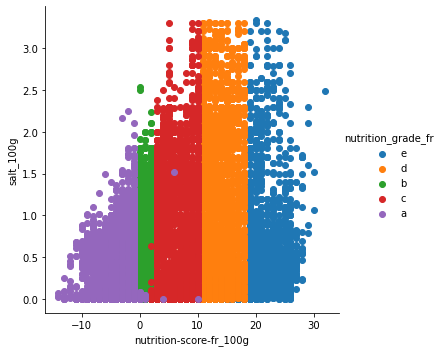

In [144]:
for i in varNum[:-1]:
    sns.FacetGrid(datasetbi, hue='nutrition_grade_fr',height=5).map(plt.scatter,'nutrition-score-fr_100g',i).add_legend()
    plt.show()

Analyse: On voit une forte entre corrélation positive entre l'énergie et le nutriscore, le sucre et le nutriscore ainsi que le sel et le nutriscore et les acides gras saturés

Observons la matrice de corrélation

<AxesSubplot:>

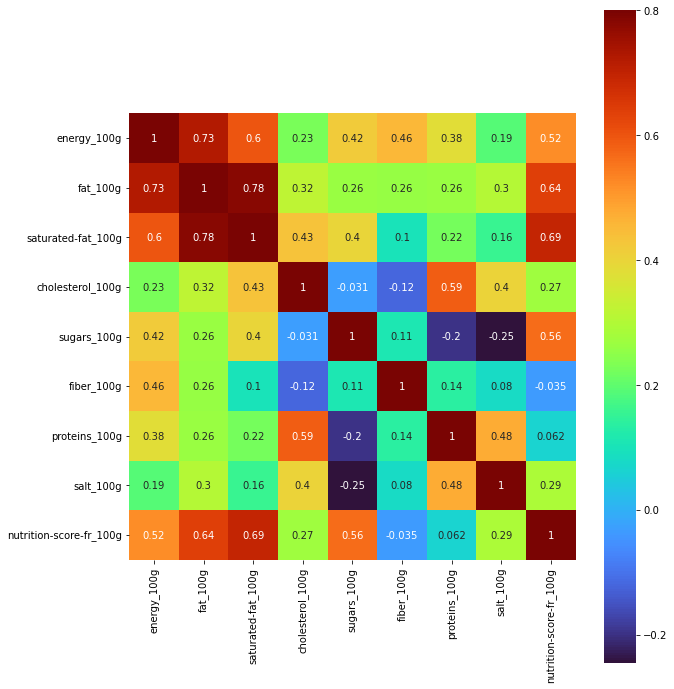

In [145]:
matrix=datasetbi.corr()
f,ax= plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='turbo', annot=True)

La matrice de corrélation confirme notre analyse précédente. On voit une forte corrélation positive entre:
- **le nutriscore et l'énergie(0.64)**
-**le nutriscore et les acides gras saturés (0.74)**
-**le nutriscore et le sucre(0.64)**
-**le nutriscore et le sel(0,39)** qui est moins importante
 D'un autre coté les aliments riches en **fibres** et en **protéines** ont une corrélation quasi nulle avec le nutriscore
 
 Ce qui est en adéquation avec la définition du nutriscore qui préconise:
-**de favoriser** les aliments riches **en fibres et en protéines**
-**et de laisser** les aliments **gras,trop salés ou trop sucrés**


## Analse multivariée

In [146]:
from sklearn import decomposition
from sklearn import preprocessing

In [147]:
datasetmulti = dataset.copy()

In [148]:
datasetmulti=datasetmulti.drop('trans-fat_100g',axis=1)

In [149]:
varA = datasetmulti.columns

In [150]:
varnum = varA[6:]
varnum

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [151]:
# selection des colonnes à prendre en compte dans l'ACP
dataPca = datasetmulti[['energy_100g', 'fat_100g',
       'saturated-fat_100g','cholesterol_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g','nutrition-score-fr_100g']]
n= dataPca.shape[0]
p = dataPca.shape[1]

In [152]:
# préparation des données pour l'ACP
X = dataPca.values


In [153]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z) 

[[-0.938345   -0.67414365 -0.59982352 ... -1.05014158 -0.87590024
   1.05398477]
 [-0.938345   -0.67414365 -0.59982352 ... -1.05014158 -0.7681623
   1.05398477]
 [ 1.70082492  1.76957087  0.06520742 ... -0.0140177   0.04059441
   0.92823491]
 ...
 [ 2.46668966  3.8414158   3.39036212 ...  0.24501327 -0.63673933
   2.18573357]
 [-0.85103641 -0.58914489 -0.59982352 ... -0.77384188  0.29044247
  -0.45501362]
 [-0.60749143  0.28209247  0.73023836 ... -0.53207964 -0.89424169
  -0.45501362]]


In [154]:
#moyenne
print(np.mean(Z,axis=0))
#écart-type
print(np.std(Z,axis=0,ddof=0))


[-1.51018647e-17 -7.55093237e-17 -6.04074589e-17  1.23331895e-16
  1.10747008e-16 -1.67379001e-16  6.04074589e-17  5.53735040e-17
 -2.51697746e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [155]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [156]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6


9


In [157]:
#variance expliquée
print(acp.explained_variance_)

[3.70771167 1.89135068 1.24762028 0.71440057 0.55666349 0.38475357
 0.21165187 0.15468826 0.13155815]


In [158]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)


[3.7075475  1.89126693 1.24756503 0.71436893 0.55663884 0.38473654
 0.2116425  0.15468141 0.13155233]


In [159]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.41194972 0.21014077 0.13861834 0.07937433 0.06184876 0.0427485
 0.02351583 0.01718682 0.01461693]


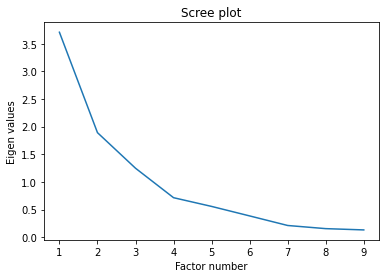

In [160]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

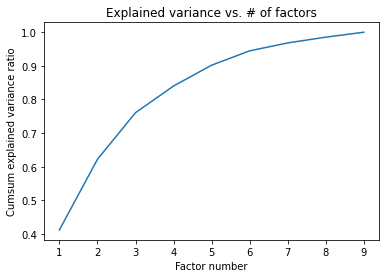

In [161]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [162]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [163]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    3.707547  2.828968
1    1.891267  1.828968
2    1.247565  1.328968
3    0.714369  0.995635
4    0.556639  0.745635
5    0.384737  0.545635
6    0.211642  0.378968
7    0.154681  0.236111
8    0.131552  0.111111


In [164]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.42754599  0.45352373  0.44395425  0.27626832  0.22520475  0.14183477
   0.23823932  0.21682939  0.40434373]
 [-0.10681131 -0.05875561 -0.11727316  0.40917834 -0.52028666 -0.07659159
   0.51710442  0.46495102 -0.20932822]
 [ 0.32152699  0.05867067 -0.17406371 -0.29879358 -0.11173694  0.79993279
   0.14580173  0.00256547 -0.31616455]
 [-0.12787955  0.17235316 -0.09052119 -0.43671279 -0.22590303  0.01917361
  -0.38167264  0.67385537  0.3222952 ]
 [ 0.02211679 -0.48256455 -0.40023293  0.07611755  0.61653417  0.09992568
   0.21278421  0.34366953  0.21720182]
 [-0.43877153 -0.08037389  0.20590653  0.5431129   0.05536218  0.50441149
  -0.44435342  0.08635208 -0.03532544]
 [ 0.50648946  0.21711241 -0.50679288  0.39560509 -0.00580857 -0.17371731
  -0.46172766  0.06094805 -0.18939292]
 [ 0.11294179 -0.23652469 -0.2501822   0.13493721 -0.45057024  0.1817794
   0.00641216 -0.35182864  0.70044218]
 [-0.47303907  0.64444233 -0.47816871  0.02786202  0.16982537  0.07822385
   0.2301136  -0.172204

In [165]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 0.82323949 -0.14689048  0.3591278  -0.10808424  0.01650094 -0.27215741
   0.23300854  0.04441951 -0.17157195]
 [ 0.87325962 -0.08080268  0.06553188  0.14567349 -0.36003288 -0.04985362
   0.09988174 -0.09302411  0.23374015]
 [ 0.85483359 -0.16127797 -0.19441951 -0.07650883 -0.29860672  0.12771792
  -0.23314813 -0.09839555 -0.17343248]
 [ 0.53195445  0.56271573 -0.33373585 -0.36911117  0.05678996  0.33687737
   0.18199662  0.05307021  0.01010559]
 [ 0.43363159 -0.71551559 -0.12480396 -0.19093403  0.45998525  0.03433958
  -0.00267221 -0.17720728  0.06159591]
 [ 0.27310275 -0.10533132  0.89348054  0.0162056   0.07455278  0.31287199
  -0.07991799  0.07149303  0.0283719 ]
 [ 0.45872964  0.71113927  0.16285244 -0.32259105  0.15875454 -0.27561969
  -0.21241605  0.00252187  0.08346253]
 [ 0.41750484  0.63941617  0.00286548  0.56954491  0.25640576  0.05356172
   0.02803892 -0.13837265 -0.06245887]
 [ 0.77856356 -0.28787517 -0.35313826  0.27240503  0.16205044 -0.02191136
  -0.08712949  0.27548

In [166]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':dataPca.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                        id     COR_1     COR_2
0              energy_100g  0.823239 -0.146890
1                 fat_100g  0.873260 -0.080803
2       saturated-fat_100g  0.854834 -0.161278
3         cholesterol_100g  0.531954  0.562716
4              sugars_100g  0.433632 -0.715516
5               fiber_100g  0.273103 -0.105331
6            proteins_100g  0.458730  0.711139
7                salt_100g  0.417505  0.639416
8  nutrition-score-fr_100g  0.778564 -0.287875


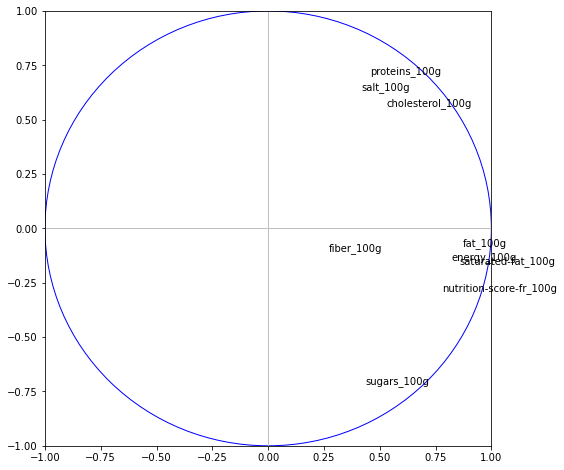

In [167]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(dataPca.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [168]:
#cosinus carré des variables
cos2var = corvar**2
dataCos = pd.DataFrame({'id':dataPca.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
print(dataCos)

                        id    COS2_1    COS2_2
0              energy_100g  0.677723  0.021577
1                 fat_100g  0.762582  0.006529
2       saturated-fat_100g  0.730740  0.026011
3         cholesterol_100g  0.282976  0.316649
4              sugars_100g  0.188036  0.511963
5               fiber_100g  0.074585  0.011095
6            proteins_100g  0.210433  0.505719
7                salt_100g  0.174310  0.408853
8  nutrition-score-fr_100g  0.606161  0.082872


In [169]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':dataPca.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                        id     CTR_1     CTR_2
0              energy_100g  0.182796  0.011409
1                 fat_100g  0.205684  0.003452
2       saturated-fat_100g  0.197095  0.013753
3         cholesterol_100g  0.076324  0.167427
4              sugars_100g  0.050717  0.270698
5               fiber_100g  0.020117  0.005866
6            proteins_100g  0.056758  0.267397
7                salt_100g  0.047015  0.216179
8  nutrition-score-fr_100g  0.163494  0.043818


In [170]:
datamulti= datasetmulti.copy()

In [171]:
datamulti = datamulti.drop(varnum,axis=1)

Les sommes en colonnes sont égales à 1 cette fois-ci.

In [172]:
data = pd.DataFrame(Z[:,:4], index=datamulti.index, 
                          columns=["F"+str(i+1) for i in range(4)])
dataExtend = pd.concat([datamulti, data], axis=1)
dataExtend.head()

,code,product_name,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,F1,F2,F3,F4
0,40608754,"Pepsi, Nouveau goût !","Eau gazéifiée, sucre, colorant caramel E150d, acidifiant : acide phosphorique, arômes (dont : extraits naturels de végétaux, caféine)",e,Beverages,Sweetened beverages,-0.938345,-0.674144,-0.599824,-0.847893
1,87177756,7Up,"Eau gazéifiée, sucre, acidifiants (acide citrique, acide malique), arômes (extraits naturels de citron et de citron vert), correcteur d'acidité (citrate de sodium)",e,Beverages,Sweetened beverages,-0.938345,-0.674144,-0.599824,-0.847893
2,10,Madeleines nature,"Farine de _blé_, huile de colza, sucre, _oeufs_ frais 18%, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d'ammonium, carbonates de sodium, diphosphates (_blé_), sel, émulsifiants : mono et diglycérides d'acides gras, _lait_ écrémé en poudre, arôme.",d,Sugary snacks,Biscuits and cakes,1.700825,1.769571,0.065207,-0.151581
3,50,Financiers aux Amandes,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_ 16.5%, _beurre_ pâtissier, farine de _blé_, _œufs_ frais, sirop de glucose-fructose, stabilisant : glycérol, sel, poudres à lever : carbonates de sodium - diphosphates (_blé_), arôme.",e,Sugary snacks,Biscuits and cakes,1.651810,1.769571,2.060300,1.483941
4,51,Fondants Citron,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_ 16.5%, _beurre_ pâtissier, farine de _blé_, pépites au citron 7% (sucre, pomme, pulpe de citron 18.1%*, dextrose, fibres d’ananas, gélifiant : alginate de sodium, correcteurs d’acidité : acide citrique - citrates de potassium, stabilisant : phosphates de calcium, arôme naturel de citron, colorant : curcumine), _œufs_ frais, sirop de glucose-fructose, stabilisant : glycérol, poudre de citron 0.9 % (équivalent à 5% de jus de citron) (jus concentré de citron, maltodextrine), sel, poudres à lever : carbonates de sodium - diphosphates (_blé_), arôme naturel de citron. *% exprimé sur les pépites équivalent à 1.2% sur l’ensemble du produit.",e,Sugary snacks,Biscuits and cakes,1.694698,1.875819,2.060300,1.516328


In [173]:
dataExtend

,code,product_name,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,F1,F2,F3,F4
0,40608754,"Pepsi, Nouveau goût !","Eau gazéifiée, sucre, colorant caramel E150d, acidifiant : acide phosphorique, arômes (dont : extraits naturels de végétaux, caféine)",e,Beverages,Sweetened beverages,-0.938345,-0.674144,-0.599824,-0.847893
1,87177756,7Up,"Eau gazéifiée, sucre, acidifiants (acide citrique, acide malique), arômes (extraits naturels de citron et de citron vert), correcteur d'acidité (citrate de sodium)",e,Beverages,Sweetened beverages,-0.938345,-0.674144,-0.599824,-0.847893
2,10,Madeleines nature,"Farine de _blé_, huile de colza, sucre, _oeufs_ frais 18%, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d'ammonium, carbonates de sodium, diphosphates (_blé_), sel, émulsifiants : mono et diglycérides d'acides gras, _lait_ écrémé en poudre, arôme.",d,Sugary snacks,Biscuits and cakes,1.700825,1.769571,0.065207,-0.151581
3,50,Financiers aux Amandes,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_ 16.5%, _beurre_ pâtissier, farine de _blé_, _œufs_ frais, sirop de glucose-fructose, stabilisant : glycérol, sel, poudres à lever : carbonates de sodium - diphosphates (_blé_), arôme.",e,Sugary snacks,Biscuits and cakes,1.651810,1.769571,2.060300,1.483941
4,51,Fondants Citron,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_ 16.5%, _beurre_ pâtissier, farine de _blé_, pépites au citron 7% (sucre, pomme, pulpe de citron 18.1%*, dextrose, fibres d’ananas, gélifiant : alginate de sodium, correcteurs d’acidité : acide citrique - citrates de potassium, stabilisant : phosphates de calcium, arôme naturel de citron, colorant : curcumine), _œufs_ frais, sirop de glucose-fructose, stabilisant : glycérol, poudre de citron 0.9 % (équivalent à 5% de jus de citron) (jus concentré de citron, maltodextrine), sel, poudres à lever : carbonates de sodium - diphosphates (_blé_), arôme naturel de citron. *% exprimé sur les pépites équivalent à 1.2% sur l’ensemble du produit.",e,Sugary snacks,Biscuits and cakes,1.694698,1.875819,2.060300,1.516328
...,...,...,...,...,...,...,...,...,...,...
22579,8853095001764,"V Fresh, Green Tea Drink With Basil Seed","Green tea 3%, basil seed (cooked) 12% fructose syrup 9% sugar 3% green tea flavour",b,unknown,unknown,-0.889330,-0.674144,-0.599824,-0.847893
22580,8901491101844,Lay's India's Magic Masala,"Potato, Edible Vegetable Oil (Sunflower Oil, Corn oil, and/or Canola Oil), Spices and Condiments (Onion Powder, Chilli Powder, Dry Mango Powder, Coriander Powder, Ginger Powder, Garlic Powder, Black Pepper Powder, Turmeric Powder, Cumin Powder, Salt, Black Salt, Sugar, Tomato Powder, Citric Acid, Tartaric Acid, Natural Flavors (E160b)",d,Salty snacks,Appetizers,2.313517,2.863930,1.174479,-0.847893
22581,90457388,Swiss Milk Chocolate with 30% whole hazelnuts,"_HAZELNUTS_, SUGAR, COCOA BUTTER, WHOLE _MILK_, COCOA MASS, SKIMMED _MILK_, _BUTTER_ FAT, WHEY, DRIED BARLEY MALT EXTRACT, _SOY_ LECITHIN (EMULSIFIER), VANILLA FLAVOR, COCOA SOLIDS 33% MIN., _MILK_ SOLIDS 23% MIN.",e,Sugary snacks,Chocolate products,2.466690,3.841416,3.390362,0.164188
22582,9160080112961,Tomato & Basil Pasta Sauce,"TOMATO PUREE (WATER, TOMATO PASTE), DICED TOMATOES (TOMATOES, CITRIC ACID), SUGAR, SALT, DEHYDRATED GARLIC, DRIED ONIONS, EXTRA VIRGIN OLIVE OIL, BASIL, CITRIC ACID, NATURAL FLAVOR.",b,Fat and sauces,Dressings and sauces,-0.851036,-0.589145,-0.599824,-0.847893
